## QOSF Screening Task 2

Implement a circuit that returns |01> and |10> with equal probability.
Requirements :
The circuit should consist only of CNOTs, RXs and RYs.
Start from all parameters in parametric gates being equal to 0 or randomly chosen.
You should find the right set of parameters using gradient descent (you can use more advanced optimization methods if you like).
Simulations must be done with sampling (i.e. a limited number of measurements per iteration) and noise.

Compare the results for different numbers of measurements: 1, 10, 100, 1000.

Bonus question:
How to make sure you produce state |01> + |10> and not |01> - |10> ?

### Imported Libraries 
Using pennylane for training the parameters and qiskit for circuit simulation

In [433]:
#Import Libraries
import qiskit as qk
import random
from math import pi
import matplotlib.pyplot as plt
from qiskit import(QuantumCircuit,execute,Aer,IBMQ)
from qiskit.visualization import plot_histogram, plot_state_qsphere
from qiskit.quantum_info import Statevector
from qiskit.providers.aer.noise import NoiseModel

**Create QML Model and Fetch Gradient Descent Optimizer**

In [434]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import GradientDescentOptimizer

**Build noise model from backend properties**

In [435]:
IBMQ.save_account('0fbdb382eb11ab0fe752ceccce6e05056adafba8b5b0036998ee49a6ff117d799049d633f04529d2c8692710bfd02974e2fa9c3981b9357ccb166452de5b0211')
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_vigo')
noise_model = NoiseModel.from_backend(backend)

configrc.store_credentials:WARNING:2020-09-27 21:29:06,487: Credentials already present. Set overwrite=True to overwrite.
c:\users\prishitaray\appdata\programs\python\python37\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-09-27 21:29:07,619: Credentials are already in use. The existing account in the session will be replaced.


**Get coupling map from backend**

In [436]:
coupling_map = backend.configuration().coupling_map

**Get basis gates from noise model**

In [437]:
basis_gates = noise_model.basis_gates

**Create qubits and classical bits**

In [438]:
q=qk.QuantumRegister(2)
c=qk.ClassicalRegister(2)

### Approach and Circuit Design
In this task, the expected outcome is to have a circuit that can generate the qubit states $\lvert01\rangle$ and $\lvert10\rangle$ with equal probabilities, using RX, RY and CNOT gates. 

For this purpose, starting with the qubits state $\lvert0\rangle\lvert0\rangle$, the RY gate was applied on the first qubit with a rotation angle $\theta$ so as to produce the intermediate state after the operation:  $(cos\frac{\theta}{2}\lvert0\rangle + sin\frac{\theta}{2}\lvert1\rangle)\lvert0\rangle$. The RY rotation operation can be explained as follows:

Starting with the first state $\lvert0\rangle = \begin{bmatrix} 0\\1 \end{bmatrix}$  
  
The RY gate is applied to this state with a rotation angle $\theta$
  
$$
\begin{aligned}
    RY(\theta) & = 
    \begin{bmatrix} 
        cos(\frac{\theta}{2}) & -sin(\frac{\theta}{2}) \\ 
        sin(\frac{\theta}{2}) & cos(\frac{\theta}{2})
    \end{bmatrix}
\end{aligned}
$$  

Then the intermediate state produced by applying RY($\theta$) on the first state is:

$$
\begin{bmatrix} 
    0 \\
    1 
\end{bmatrix}
\xrightarrow{RY(\theta)}
\begin{bmatrix} 
    cos(\frac{\theta}{2}) \\
    sin(\frac{\theta}{2})
\end{bmatrix}
$$

Thus the states now become $(cos\frac{\theta}{2}\lvert0\rangle + sin\frac{\theta}{2}\lvert1\rangle)\lvert0\rangle$

The first qubit returns states $\lvert0\rangle$ and $\lvert1\rangle$ with equal probabilty.

A CNOT gate is then implemented from qubit 0 to qubit 1 to try and eliminate unwanted states, to only allow the combined states $\lvert00\rangle$ and $\lvert11\rangle$ with an equal probability. 

<center>($cos\frac{\theta}{2}\lvert0\rangle$ + $sin\frac{\theta}{2}\lvert1\rangle)\lvert0\rangle$ $\xrightarrow{CX}$ $cos\frac{\theta}{2}\lvert00\rangle$ + $sin\frac{\theta}{2}\lvert11\rangle$</center>

The CNOT gate will reverse the state of the second qubit only when the first qubit state is $|1>$. In this case, CX when applied on $(cos\frac{\theta}{2}\lvert0\rangle)\lvert0\rangle$ will return $cos\frac{\theta}{2}\lvert00\rangle$ and CX when applied to $(sin\frac{\theta}{2}\lvert1\rangle)\lvert0\rangle$ will return  $sin\frac{\theta}{2}\lvert11\rangle$ as the state of the first qubit is $\lvert1\rangle$, hence the state of the second qubit, that is $\lvert0\rangle$ gets reversed to $\lvert1\rangle$

Finally, when an RX rotation operation is performed with an angle of $\pi$, the half angle $\frac{\pi}{2}$ will rotate the current states by 90 degrees anticlockwise. Thus $\lvert00\rangle$ will become $\lvert01\rangle$ and $\lvert11\rangle$ will become $\lvert10\rangle$ which can be visualized on the quantum sphere. 


$$
\begin{aligned}
    RX(\pi) & =  
    \begin{bmatrix} 
        cos(\frac{\pi}{2}) & -isin(\frac{\pi}{2}) \\ 
        -isin(\frac{\pi}{2}) & cos(\frac{\pi}{2})
    \end{bmatrix}\\
\end{aligned}
$$ 

$$
\begin{bmatrix} 
    cos(\frac{\theta}{2}) \\
    sin(\frac{\theta}{2})
\end{bmatrix}
\xrightarrow{RX(\pi)}
\begin{bmatrix} 
    cos(\frac{\theta}{2})cos(\frac{\pi}{2}) - isin(\frac{\theta}{2})sin(\frac{\pi}{2}) \\
    -icos(\frac{\theta}{2})sin(\frac{\pi}{2}) + sin(\frac{\theta}{2})cos(\frac{\pi}{2})
\end{bmatrix}
$$

<center>$cos\frac{\theta}{2}\lvert00\rangle$ + $sin\frac{\theta}{2}\lvert11\rangle$ $\xrightarrow{RX(\pi)}$ $cos\frac{\theta}{2}\lvert01\rangle$ + $sin\frac{\theta}{2}\lvert10\rangle$</center> 

Thus, it can be observed that the states $\lvert01\rangle$ and $\lvert10\rangle$ can be returned with an equal probability.

The only parameter that needs to be optimized is the $\theta$ RY rotation angle, such that these two states can be equally observed in a given time frame. 

### Optimizing the Parameters

To optimize the parameters($\theta$), the pennylane QML model will be trained using the Gradient Descent Optimizer. 

The model has been trained for 1000 steps with a learning rate $\alpha=0.1$

We would expect the target states for the 4 possible outcomes, i.e. $(\lvert00\rangle,\lvert01\rangle,\lvert10\rangle,\lvert11\rangle)$ to be $T=(p_{\lvert00\rangle},p_{\lvert01\rangle},p_{\lvert10\rangle},p_{\lvert11\rangle})=(0,0.5,0.5,0)$ respectively, and the model would have to produce this outcome in the simulations.

The parameter update after step i of training will be as follows: 

$$
\theta_{i+1} := \theta_i - \alpha \frac{\partial }{\partial \theta_i} J (\theta)
$$

Here $\theta$ is the rotation angle of the RY operation that is being applied on the first qubit, and $\alpha$ is the learning rate.

The cost function $J (\theta)$ is computed using the difference between 0.5 (the expected probability value) and expectation value of the supplied observable, which is the Hermitian matrix of the target state density when applied to both wires 0 and 1 of the quantum circuit. 

Therefore, the cost $J (\theta)$ can be computed as:

Generating the density matrix $\rho$

$$
\rho = T\otimes T = 
\begin{bmatrix} 
        p_{\lvert00\rangle}.p_{\lvert00\rangle} & p_{\lvert00\rangle}.p_{\lvert01\rangle} & p_{\lvert00\rangle}.p_{\lvert10\rangle} & p_{\lvert00\rangle}.p_{\lvert11\rangle}\\
        p_{\lvert01\rangle}.p_{\lvert00\rangle} & p_{\lvert01\rangle}.p_{\lvert01\rangle} & p_{\lvert01\rangle}.p_{\lvert10\rangle} & p_{\lvert01\rangle}.p_{\lvert11\rangle}\\
        p_{\lvert10\rangle}.p_{\lvert00\rangle} & p_{\lvert10\rangle}.p_{\lvert01\rangle} & p_{\lvert10\rangle}.p_{\lvert10\rangle} & p_{\lvert10\rangle}.p_{\lvert11\rangle}\\
        p_{\lvert11\rangle}.p_{\lvert00\rangle} & p_{\lvert11\rangle}.p_{\lvert01\rangle} & p_{\lvert11\rangle}.p_{\lvert10\rangle} & p_{\lvert11\rangle}.p_{\lvert11\rangle}
\end{bmatrix}
$$

Then the Hermitian Matrix (conjugate transpose) generated on the density matrix $\rho$ will be:

$$
\tau= \rho^{H}
$$

$$
J (\theta)= 0.5- expval(\tau)
$$

This cost needs to be optimized using Gradient Descent. 

In [439]:
dev = qml.device("default.qubit",wires=2)

**Define target states**

In [440]:
target_state = np.tensor([0, 0.5, 0.5, 0])

### Training QML Model

In [441]:
#Training QML Model

steps = 1500
params1 = np.random.rand(1)
params = np.random.rand(1)
opt = GradientDescentOptimizer(0.1)
density = np.outer(target_state, target_state)

@qml.qnode(dev)
def circuit(var,noise=0.0):
    density = np.outer(target_state, target_state)
    qml.RY(var[0], wires=0)
    qml.CNOT(wires=[0,1])
    qml.RX(pi, wires=1)
    return qml.expval(qml.Hermitian(density, wires=[0,1]))

def cost(var):
    return 0.5-circuit(var)

def noise_cost(var):
    return 0.5-circuit(var,noise=0.3)

costs=[]

for i in range(steps):
    params = opt.step(cost, params)

    if (i + 1) % 100 == 0:
        print("Iteration Number {:5d} Cost: {: .20f}".format(i + 1, cost(params)))
    costs.append(cost(params))

print("Optimized parameters (theta for Ry) without noise: {}".format(params))



Iteration Number   100 Cost:  0.00296114280810927388
Iteration Number   200 Cost:  0.00001883700236898767
Iteration Number   300 Cost:  0.00000011911092845374
Iteration Number   400 Cost:  0.00000000075313866255
Iteration Number   500 Cost:  0.00000000000476219064
Iteration Number   600 Cost:  0.00000000000003019807
Iteration Number   700 Cost:  0.00000000000000022204
Iteration Number   800 Cost:  0.00000000000000000000
Iteration Number   900 Cost:  0.00000000000000022204
Iteration Number  1000 Cost:  0.00000000000000022204
Iteration Number  1100 Cost:  0.00000000000000000000
Iteration Number  1200 Cost:  0.00000000000000011102
Iteration Number  1300 Cost:  0.00000000000000000000
Iteration Number  1400 Cost:  0.00000000000000011102
Iteration Number  1500 Cost:  0.00000000000000011102
Optimized parameters (theta for Ry) without noise: [1.57079633]


**Training Results and Convergence**

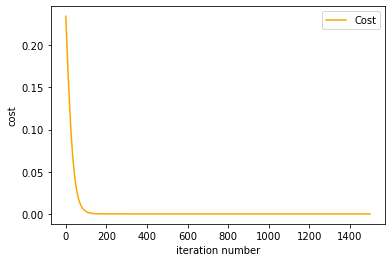

In [442]:
colours = ["orange","purple"]
plt.plot(range(steps), costs, colours[0], label="Cost", linewidth=1.5)
plt.xlabel('iteration number')
plt.ylabel('cost')
plt.legend()
plt.show()

### Circuit Simulation

In [443]:
#==================================================
# Rotation Operation Ry along y-axis on first qubit 
#==================================================
circuit=qk.QuantumCircuit(q)
circuit.ry(params[0],q[0])

In [444]:
#============================================================================================
#CNOT Gate on the first to the second qubit (Negates second state only if first state is 1)
#============================================================================================
circuit.cx(0,1)

In [445]:
#===================================================
#Rotation Operation Rx along x-axis on second qubit 
#===================================================
circuit.rx(pi,q[1])

**Display Circuit**

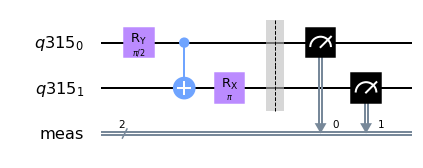

In [446]:
circuit.measure_all()
circuit.draw('mpl')

In [447]:
simulator = Aer.get_backend('qasm_simulator')
sv_simulator = Aer.get_backend('statevector_simulator')

### Simulation for one shot

In [448]:
#Checking for 1 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1,noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'10': 1}


**Histogram of probabilities**

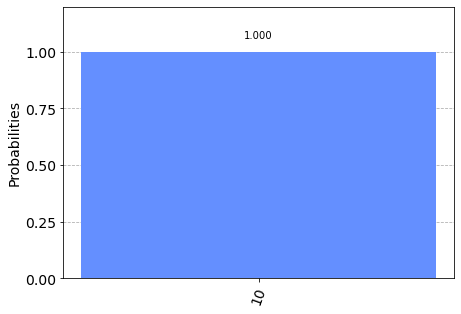

In [449]:
#Histogram of probabilities for 01 and 10 in one measurement
plot_histogram(counts)


**Quantum sphere Simulation**

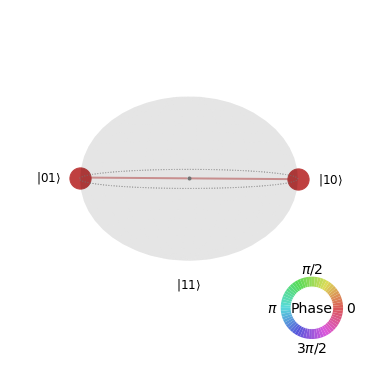

In [450]:
plot_state_qsphere(
    Statevector.from_label('00').evolve(circuit.remove_final_measurements(inplace=False)),
    figsize=(6.5, 6.5)
)

### Simulation for 10 shots

In [451]:
#Checking for 10 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=10,noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'01': 5, '10': 5}


**Histogram of probabilities**

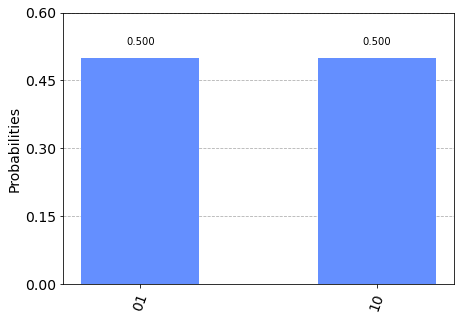

In [452]:
#Histogram of probabilities for 01 and 10 in ten measurements
plot_histogram(counts)

**Quantum Sphere Simulation**

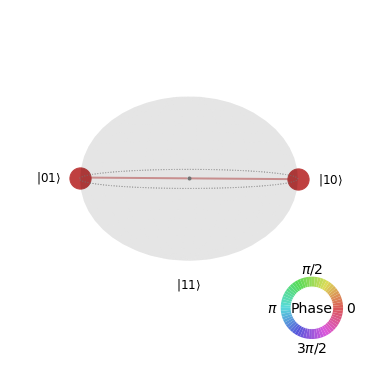

In [453]:
plot_state_qsphere(
    Statevector.from_label('00').evolve(circuit.remove_final_measurements(inplace=False)),
    figsize=(6.5, 6.5)
)

### Simulation for 100 shots

In [454]:
#Checking for 100 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=100,noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'00': 2, '01': 45, '10': 50, '11': 3}


**Histogram of probabilities**

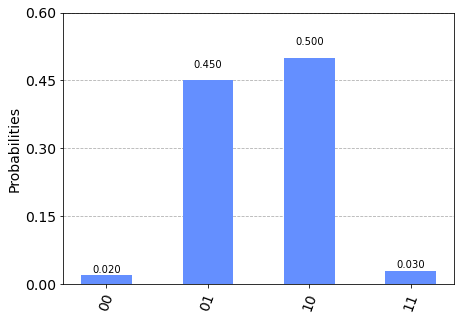

In [455]:
#Histogram of probabilities for 01 and 10 in hundred measurements
plot_histogram(counts)

**Quantum Sphere simulation**

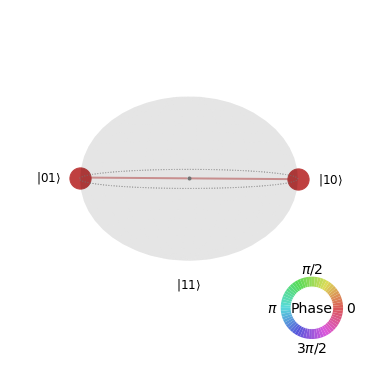

In [456]:
plot_state_qsphere(
    Statevector.from_label('00').evolve(circuit.remove_final_measurements(inplace=False)),
    figsize=(6.5, 6.5)
)

### Simulation for 1000 shots

In [457]:
#Checking for 1000 measurements
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000, noise_model=noise_model)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 01 and 10 are:",counts)


Total count for 01 and 10 are: {'00': 42, '01': 487, '10': 454, '11': 17}


**Histogram of probabilities**

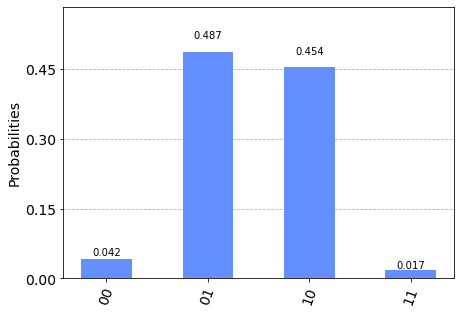

In [458]:
#Histogram of probabilities for 01 and 10 in thousand measurements
plot_histogram(counts)

**Quantum Sphere Simulation**

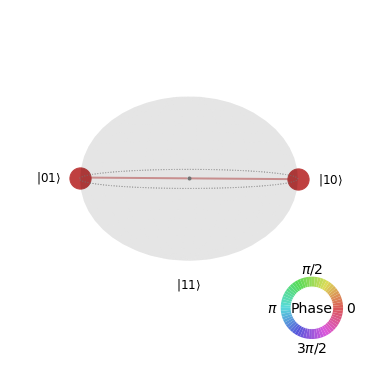

In [459]:
plot_state_qsphere(
    Statevector.from_label('00').evolve(circuit.remove_final_measurements(inplace=False)),
    figsize=(6.5, 6.5)
)

In [460]:
#Bonus Question 